#                       ZOMATO Project II :     Part-3

#        Question 3.1

##        Plot the bar graph top 15 restaurants have a maximum number of                 outlets.

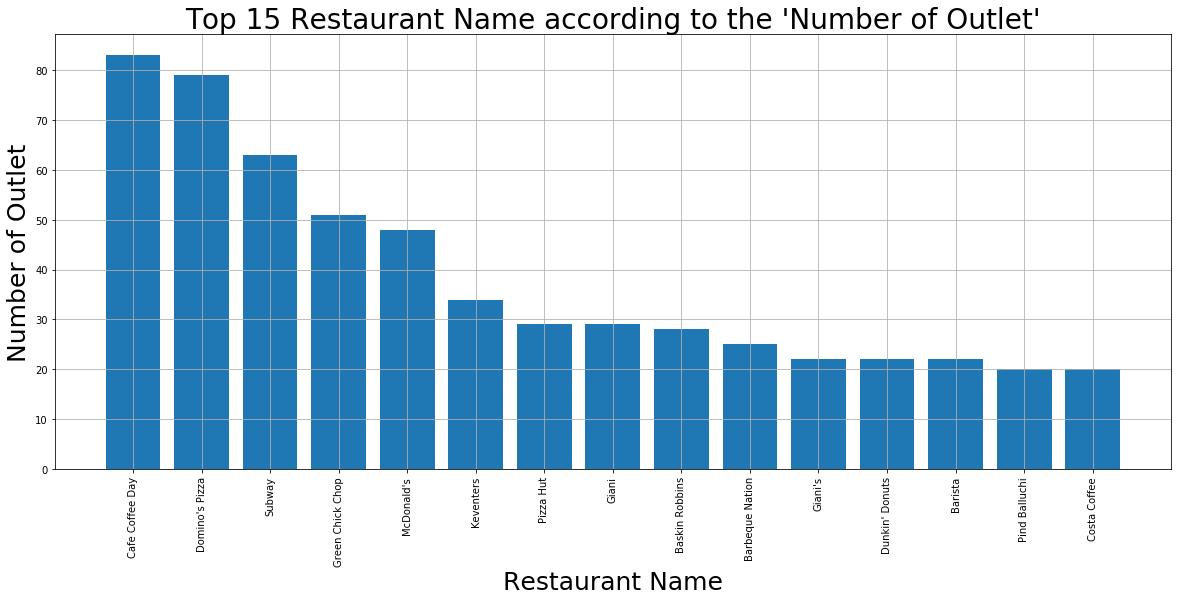

In [2]:

import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv('zomato.csv',encoding='latin-1')
zomato= df[df['Country Code']==1]
hash={}
def outlet(name):
    hash[name] = hash.get(name,0)+1
zomato['Restaurant Name'].apply(outlet)
            
ans = [ [value,key] for key,value in hash.items()]
ans.sort(reverse=True)
Restaraunt_X = []
outlet_Y = []

for i in ans:
    Restaraunt_X.append(i[1])
    outlet_Y.append(i[0])
    
fig = plt.figure(figsize = (20, 8))
plt.bar(Restaraunt_X[0:15],outlet_Y[0:15])
plt.xticks(rotation=90)
plt.title("Top 15 Restaurant Name according to the 'Number of Outlet'",fontsize=28)
plt.xlabel("Restaurant Name",fontsize=25)
plt.ylabel("Number of Outlet", fontsize=25)
plt.grid()
plt.show()

#           Question 3.2

##            Plot the histogram of aggregate rating of restaurant ( drop the                       unrated restaurant )

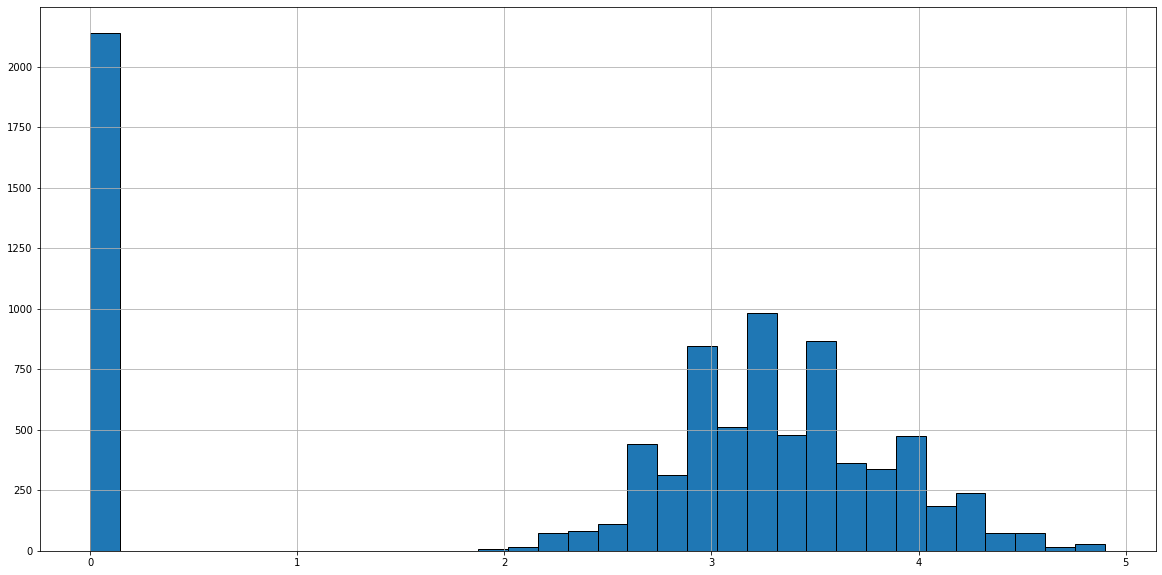

In [3]:
# Answer 3.2:=>>

import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv('zomato.csv',encoding='latin-1')
zomato= df[df['Country Code']==1]

zomato = zomato[zomato['Rating text']!='Not Rated'].copy()
ratings = np.array(zomato['Aggregate rating'])
nan_ratings = np.isnan(ratings)
not_nan_ratings = ~ nan_ratings
ratings = ratings[not_nan_ratings]

xt = np.arange(6)
fig = plt.figure(figsize = (20, 10))
plt.hist(ratings,bins = "auto", edgecolor = "black")
plt.xticks(xt)
plt.grid()
plt.show()

#         Question 3.3

##          Plot the bar graph top 10 restaurants in the data with the highest                 number of votes

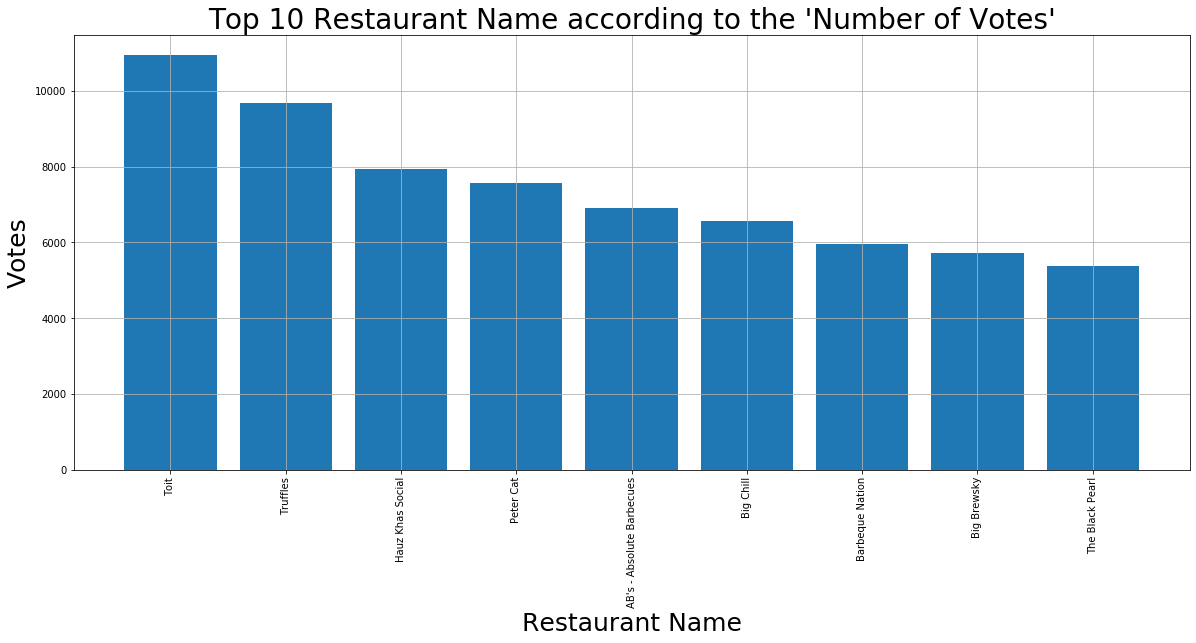

In [4]:
# Anwer 3.3:=>>

import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv('zomato.csv',encoding='latin-1')
zomato= df[df['Country Code']==1]

#vote = np.array(zomato['Votes'])
#rest = np.array(zomato['Restaurant Name'])

hash={}
def get_votes(votes_with_name_address):
    votes = int(votes_with_name_address.split("###")[0])
    name_with_address = votes_with_name_address.split("###")[1]
    hash[name_with_address] = hash.get(name_with_address,0) + votes
    return votes_with_name_address

zomato = zomato[zomato['Rating text']!='Not Rated'].copy()
zomato['Votes_with_City'] = zomato['Votes'].astype(str)+"###" + zomato['Restaurant Name']+"$$$"+zomato['Locality']
zomato['Votes_with_City'].apply(get_votes)

votes_names = [[value,key] for key,value in hash.items()]
votes_names.sort(reverse=True)

votes_Y = [i[0] for i in votes_names][:10]
names_X = [i[1].split("$$$")[0] for i in votes_names][:10]

fig = plt.figure(figsize = (20, 8))
plt.bar(names_X[0:10],votes_Y[0:10])
plt.xticks(rotation=90)
plt.title("Top 10 Restaurant Name according to the 'Number of Votes'",fontsize=28)
plt.xlabel("Restaurant Name",fontsize=25)
plt.ylabel("Votes", fontsize=25)
plt.grid()
plt.show()

# Questsion : 3.4

### Plot the pie graph of top 10 cuisines present in restaurants in the USA

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:4784: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


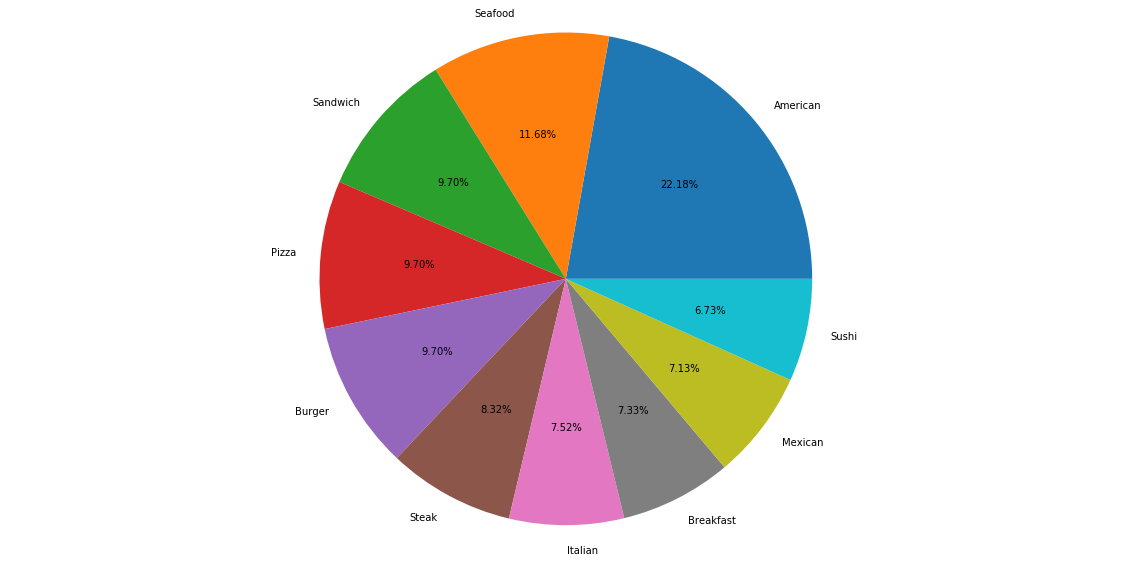

In [5]:
# Answer 3.3:=>>

import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv('zomato.csv',encoding='latin-1')
zomato= df[df['Country Code']==216]
zomato['Cuisines'].dropna(inplace=True)
hash={}

def get_cuisine(name):
    name=str(name)
    cus_list=name.split(", ")
    
    for ele in cus_list:
        #print(ele)
        hash[ele] = hash.get(ele,0) + 1
    return str(name)

zomato['Cuisines'].apply(get_cuisine)

ans= [[value,key] for key, value in hash.items()]
ans.sort(reverse=True)
    
    
ans=np.array(ans)
X=ans[:,0][0:10]
Y=ans[:,1][0:10]
fig = plt.figure(figsize = (20, 10))
plt.pie(X, labels = Y, autopct = "%.2f%%") 

plt.axis("equal")
plt.show()    

    



##                                           Questsion : 3.5

###    Plot the bubble graph of a number of Restaurants present in the city of India and             keeping  the weighted restaurant rating of the city in a bubble.

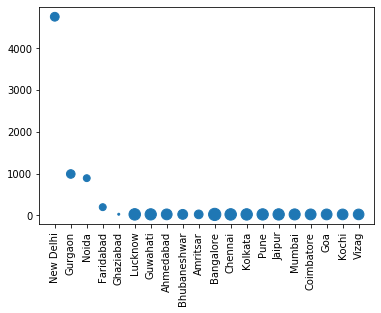

In [6]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv('zomato.csv',encoding='latin-1')
zomato= df[df['Country Code']==1]
rating=np.array(zomato['Aggregate rating'])
votes=np.array(zomato['Votes'])
cities = np.array(zomato['City'])

hash={}

for i in range(len(rating)):
    if votes[i]!=0:
        area=cities[i]
        if  area not in hash:
            hash[area]=[rating[i]*votes[i],votes[i],1]
        else:
            hash[area][0]+=rating[i]*votes[i]
            hash[area][1]+=votes[i]
            hash[area][2]+=1

ans=[]
for key,value in hash.items():
    weight = round(value[0]/value[1],2)
    ans.append([value[2],weight,key])
    

ans.sort(reverse=True)

cities = np.array([ i[2] for i in ans][0:20])
ratings = np.array([ i[1] for i in ans][0:20])
ratings = ratings-3
counts = np.array([ i[0] for i in ans][0:20])
#ratings[ratings[0]<0] = -ratings[0]

#print(cities)
#print(ratings)

plt.scatter(cities,counts,s=ratings*100)
plt.xticks(rotation=90)
plt.show()


